In [1]:
# The below code generates a wrapper using matplotlib which can be used easily for development purpose
from matplotlib import pyplot
from numpy import arange
import bisect

def scatterplot(x,y):
    pyplot.plot(x,y,'b.')
    pyplot.xlim(min(x)-1,max(x)+1)
    pyplot.ylim(min(y)-1,max(y)+1)
    pyplot.show()

def barplot(labels,data):
    pos=arange(len(data))
    pyplot.xticks(pos+0.4,labels)
    pyplot.bar(pos,data)
    pyplot.show()

def histplot(data,bins=None,nbins=5):
    minx,maxx=min(data),max(data)
    space=(maxx-minx)/float(nbins)
    if not bins: bins=arange(minx,maxx,space)
    binned=[bisect.bisect(bins,x) for x in data]
    l=['%.1f'%x for x in list(bins)+[maxx]] if space<1 else [str(int(x)) for x in list(bins)+[maxx]]
    displab=[x+'-'+y for x,y in zip(l[:-1],l[1:])]
    barplot(displab,[binned.count(x+1) for x in range(len(bins))])

def barchart(x,y,numbins=5):
    datarange=max(x)-min(x)
    bin_width=float(datarange)/numbins
    pos=min(x)
    bins=[0 for i in range(numbins+1)]

    for i in range(numbins):
        bins[i]=pos
        pos+=bin_width
    bins[numbins]=max(x)+1
    binsum=[0 for i in range(numbins)]
    bincount=[0 for i in range(numbins)]
    binaverage=[0 for i in range(numbins)]

    for i in range(numbins):
        for j in range(len(x)):
            if x[j]>=bins[i] and x[j]<bins[i+1]:
                bincount[i]+=1
                binsum[i]+=y[j]

    for i in range(numbins):
        binaverage[i]=float(binsum[i])/bincount[i]
    barplot(range(numbins),binaverage)

def piechart(labels,data):
    fig=pyplot.figure(figsize=(7,7))
    pyplot.pie(data,labels=labels,autopct='%1.2f%%')
    pyplot.show()

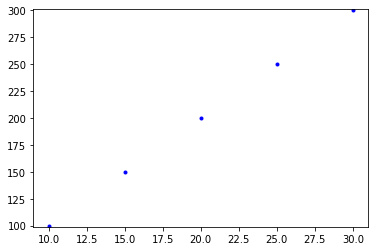

In [7]:
#Using the wrapper
scatterplot([10,15,20,25,30],[100,150,200,250,300])


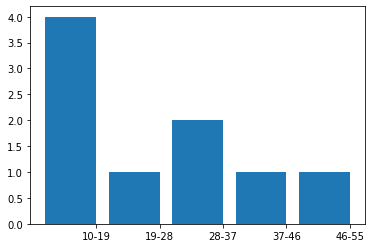

In [8]:
histplot([10,20,10,30,35,45,55,12,14])


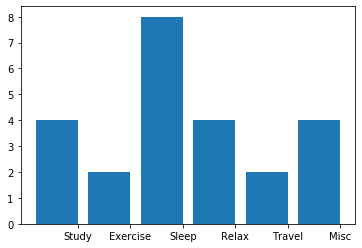

In [10]:
barplot(['Study','Exercise','Sleep','Relax','Travel','Misc'],[4,2,8,4,2,4])

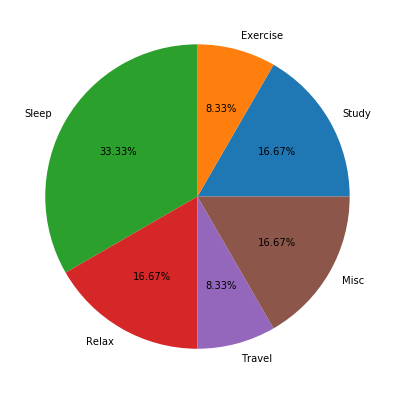

In [11]:
piechart(['Study','Exercise','Sleep','Relax','Travel','Misc'],[4,2,8,4,2,4])

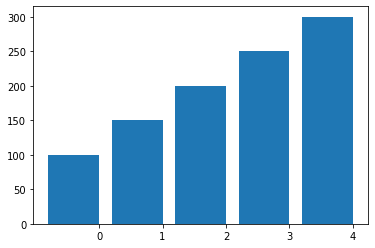

In [19]:
barchart([1,2,3,4,5],[100,150,200,250,300],5)